<a href="https://colab.research.google.com/github/Sophia124990/Tareas_CienciaDatos/blob/main/Tarea10Sophia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TAREA 10 - Estadística descriptiva con python

In [13]:
#autor: Karla Sophia López González
#idautor: 225594-2
#profesor: Lázaro Bustio Martínez

Inciso a

In [12]:
#Cargamos los datos desde el archivo CSV y los almacenamos en un DataFrame llamado ventas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ventas_df = pd.read_csv('/content/datos_ventas - Copy.csv')
ventas_df.head()

,Producto,Categoria,Fecha,Cantidad,Precio
0,Producto B,Categoria 1,2023-02-05,16,37.00
1,Producto A,Categoria 2,2022-08-24,5,30.24
2,Producto A,Categoria 2,2023-05-07,3,23.29
3,Producto C,Categoria 1,2023-01-07,13,28.30
4,Producto A,Categoria 1,2023-05-31,10,34.89


Inciso b

In [3]:
#Calculamos y mostramos el resumen estadístico completo del DataFrame, incluyendo medidas de tendencia central, dispersión y forma.
print ("\nInformación:\n")
print(ventas_df.info())
print ("\n\nDescripción:\n")
print(ventas_df.describe())


Información:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Producto   100 non-null    object 
 1   Categoria  100 non-null    object 
 2   Fecha      100 non-null    object 
 3   Cantidad   100 non-null    int64  
 4   Precio     100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB
None


Descripción:

         Cantidad      Precio
count  100.000000  100.000000
mean     9.570000   28.888100
std      5.876258   11.189085
min      1.000000   10.660000
25%      5.000000   19.747500
50%      9.000000   27.250000
75%     15.000000   36.842500
max     20.000000   49.790000


Inciso c

In [24]:
#c) Realizamos un análisis por categoría de productos. Para cada categoría, calculamos y mostramos:
#i.La cantidad total de productos vendidos.
#ii.El precio promedio de venta
#iii.La cantidad máxima y mínima de productos vendidos
#iv.El rango intercuartil (IQR) de los precios.

def iqr(x):
  return np.percentile(x, 75) - np.percentile(x, 25)

categoria = ventas_df.groupby('Categoria')
df_paso3 = pd.DataFrame(categoria.agg({"Cantidad": ["sum","mean", "max", "min"], "Precio": iqr}))
df_paso3


Cantidad                     Precio
                 sum       mean max min     iqr
Categoria                                      
Categoria 1      462  10.043478  20   1  18.110
Categoria 2      495   9.166667  20   1  14.645

Inciso d

In [26]:
#Calcular y mostrar la matriz de correlación entre las columnas "cantidad" y "precio"

corr = ventas_df[['Cantidad', 'Precio']].corr()
df_paso4 = pd.DataFrame(corr)
df_paso4


,Cantidad,Precio
Cantidad,1.000000,0.018435
Precio,0.018435,1.000000


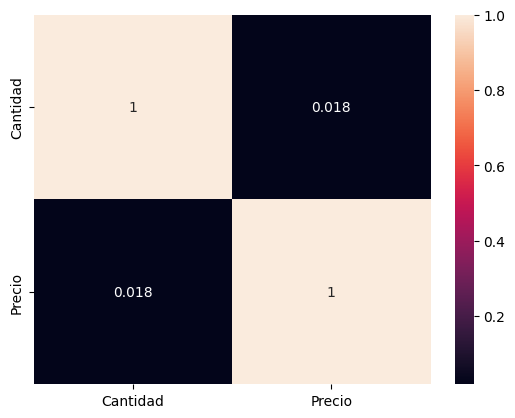

In [27]:
#así como también visualizarla mediante un mapa de calor
sns.heatmap(corr, annot=True)
plt.show()


Inciso e

In [30]:
#Identificamos los productos con ventas atípicas (outliers) en función de la cantidad
#vendida. Mostramos los nombres de los productos y las cantidades correspondientes.

# Calculamos el rango intercuartílico (IQR) para detectar outliers en la columna "Cantidad"
Q1 = ventas_df['Cantidad'].quantile(0.25)
Q3 = ventas_df['Cantidad'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los productos que tienen una cantidad vendida fuera de los límites
outliers = ventas_df[(ventas_df['Cantidad'] < limite_inferior) | (ventas_df['Cantidad'] > limite_superior)]

# Mostramos los productos con ventas atípicas y las cantidades correspondientes
outliers_productos = outliers[['Producto', 'Cantidad']]

df_paso5 = pd.DataFrame(outliers_productos)
print(df_paso5)


Empty DataFrame
Columns: [Producto, Cantidad]
Index: []


Inciso f

In [39]:
#Calcular y mostrar el porcentaje de ventas acumuladas por categoría. Ordenar las categorías de mayor a menor por su porcentaje de ventas acumuladas.

#Calculamos las ventas totales por categoría
ventas_por_categoria = ventas_df.groupby('Categoria')['Cantidad'].sum()

#Calculamos el porcentaje de ventas por categoría
porcentaje_ventas = ventas_por_categoria / ventas_por_categoria.sum() * 100

#Calculamos el porcentaje de ventas acumuladas
porcentaje_ventas_acumuladas = porcentaje_ventas.cumsum()

#Ordenamos las categorías de mayor a menor por su porcentaje de ventas acumuladas
porcentaje_ventas_acumuladas_ordenadas = porcentaje_ventas_acumuladas.sort_values(ascending=False)

#Mostramos el porcentaje de ventas acumuladas por categoría
df_paso6 = pd.DataFrame(porcentaje_ventas_acumuladas_ordenadas)
df_paso6

,Cantidad
Categoria,
Categoria 2,100.000000
Categoria 1,48.275862


Inciso g

In [37]:
''' Realizar un análisis temporal de las ventas. Agrupar las ventas por mes y mostrar:
i.La cantidad total de productos vendidos en cada mes.
ii. El precio promedio de venta en cada mes.
iii. El mes con el mayor y menor monto total de ventas. '''

#creamos la columnas Mes para exraer el mes de la columna Fecha
ventas_df['Mes'] = ventas_df['Fecha'].dt.month

#agrupamos las ventas por mes y calculamos lo solicitado
ventas_por_mes = ventas_df.groupby('Mes').agg(
    Cantidad_Total=('Cantidad', 'sum'),
    Precio_Promedio=('Precio', 'mean')
)

# Calcula el monto total de ventas por mes
ventas_por_mes['Monto_Total'] = ventas_por_mes['Cantidad_Total'] * ventas_por_mes['Precio_Promedio']

# Encuentra el mes con mayor y menor monto total de ventas
mes_mayor_venta = ventas_por_mes['Monto_Total'].idxmax()
mes_menor_venta = ventas_por_mes['Monto_Total'].idxmin()

print(f"Mes con mayor venta: {mes_mayor_venta}")
print(f"Mes con menor venta: {mes_menor_venta}")

print(ventas_por_mes)

df_paso7 = pd.DataFrame(ventas_por_mes)


Mes con mayor venta: 1
Mes con menor venta: 9
     Cantidad_Total  Precio_Promedio  Monto_Total
Mes                                              
1               147        33.699231  4953.786923
2                92        28.065556  2582.031111
3                92        28.308000  2604.336000
4                40        29.124000  1164.960000
5                53        26.615000  1410.595000
6                89        30.208750  2688.578750
7                47        33.032000  1552.504000
8                63        32.165000  2026.395000
9                31        26.011667   806.361667
10               91        33.404286  3039.790000
11               72        21.668182  1560.109091
12              140        27.262143  3816.700000


Inciso h

In [38]:
#Exportar los resultados obtenidos en los pasos 3, 4, 5, 6 y 7 a un nuevo archivo CSV llamado "resultados ventas.esu".
df_final = pd.concat([df_paso3, df_paso4, df_paso5, df_paso6, df_paso7], ignore_index=True)
df_final.to_csv('resultados_ventas.csv', index=False)